In [1]:
import cv2
import matplotlib
matplotlib.rcParams['figure.figsize']=16,8
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, signal
import skimage 
import operator 
import os
import random

import glob

from PIL import Image
import pandas as pd

from skimage import measure
from sklearn import datasets, metrics, neighbors, svm

In [2]:
def imshow(img,ax=None,**kwargs):
    if ax is None:
        ax=plt.gca()
    if len(img.shape)==2:
        #if grayscale, make the image RGB in order for matplotlib to ignore vmin and vmax arguments
        img=np.repeat(img[...,None],3,2)
    return ax.imshow(img,**kwargs) 

In [3]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
...

Using TensorFlow backend.


Ellipsis

In [85]:
...
# load the dataset
#dataset = loadtxt('Desktop/Dataset_ANSYS_Results_2.csv', delimiter=',')
dataset = pd.read_csv('New_Iso_data.csv')               #can also read the data using pandas library 
# split into input (X) and output (y) variables
dataset = np.matrix(dataset)
y_train = dataset[0:160,3].astype(float)
X_train = dataset[0:160,0:3]
...

Ellipsis

In [86]:
X_train

matrix([[1.0000e+00, 6.7086e+01, 1.6630e+03],
        [2.0000e+00, 2.7847e+02, 1.6630e+03],
        [3.0000e+00, 4.1648e+02, 1.6630e+03],
        [4.0000e+00, 9.0921e+02, 1.6630e+03],
        [5.0000e+00, 1.1653e+03, 1.6630e+03],
        [6.0000e+00, 1.3819e+03, 1.6630e+03],
        [7.0000e+00, 1.7533e+03, 1.6630e+03],
        [8.0000e+00, 1.7998e+03, 1.6630e+03],
        [9.0000e+00, 2.2820e+03, 1.6630e+03],
        [1.0000e+01, 2.4344e+03, 1.6630e+03],
        [1.1000e+01, 2.9008e+03, 1.6630e+03],
        [1.2000e+01, 3.3794e+03, 1.6630e+03],
        [1.3000e+01, 3.8191e+03, 1.6630e+03],
        [1.4000e+01, 4.3622e+03, 1.6630e+03],
        [1.5000e+01, 4.6750e+03, 1.6630e+03],
        [1.6000e+01, 4.8047e+03, 1.6630e+03],
        [1.7000e+01, 5.0325e+03, 1.6630e+03],
        [1.8000e+01, 5.2318e+03, 1.6630e+03],
        [1.9000e+01, 5.3084e+03, 1.6630e+03],
        [2.0000e+01, 5.6658e+03, 1.6630e+03],
        [2.1000e+01, 6.1759e+03, 1.6630e+03],
        [2.2000e+01, 6.2599e+03, 1

In [87]:
X_train.shape #just to check the shape of the input training set (has 2 variables )


(160, 3)

In [88]:
y_train

matrix([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [90]:
#Test set
y_test = dataset[160:201,3]
X_test = dataset[160:201,0:3]

...
# make class predictions with the model
#predictions = model.predict_classes(X_test)

Ellipsis

In [72]:
from sklearn.linear_model import LogisticRegression

In [91]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Mohamed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohamed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.88


In [93]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [94]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.56
Accuracy of LDA classifier on test set: 0.50


C:\Users\Mohamed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohamed\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [95]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 1.00
Accuracy of GNB classifier on test set: 1.00


C:\Users\Mohamed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
from sklearn.svm import SVC


svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.50


C:\Users\Mohamed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohamed\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [97]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [98]:

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[20  0]
 [ 0 20]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversion

([<matplotlib.axis.XTick at 0x2505159e438>,
 <a list of 5 Text xticklabel objects>)

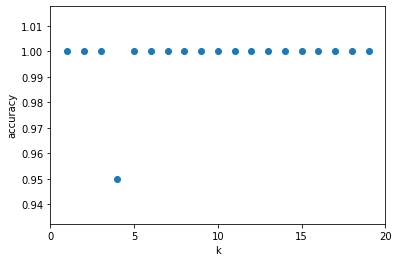

In [99]:

k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [100]:
knn.score(X_test, y_test)

1.0

In [83]:
pred = knn.predict(X_test)

In [84]:
print(pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
